In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("tips.csv")
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [2]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [3]:
df.isnull().sum()


total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [4]:
df['tip_percentage'] = (df['tip'] / df['total_bill']) * 100
df.head()


,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


### Average Tip and Average Tip Percentage by Gender and Smoker


In [5]:
df.groupby(["sex", "smoker"])[["tip", "tip_percentage"]].mean().round(2)


tip  tip_percentage
sex    smoker                      
Female No      2.77           15.69
       Yes     2.93           18.22
Male   No      3.11           16.07
       Yes     3.05           15.28

### Total and Average total_bill collected on each day


In [6]:
df.groupby("day")["total_bill"].agg(["sum", "mean", "count"]).round(2)


,sum,mean,count
day,,,
Fri,325.88,17.15,19
Sat,1778.40,20.44,87
Sun,1627.16,21.41,76
Thur,1096.33,17.68,62


### Sorting customers by highest tip percentage


In [7]:
df.sort_values(by="tip_percentage", ascending=False).head(10)


,total_bill,tip,sex,smoker,day,time,size,tip_percentage
172,7.25,5.15,Male,Yes,Sun,Dinner,2,71.034483
178,9.60,4.00,Female,Yes,Sun,Dinner,2,41.666667
67,3.07,1.00,Female,Yes,Sat,Dinner,1,32.573290
232,11.61,3.39,Male,No,Sat,Dinner,2,29.198966
183,23.17,6.50,Male,Yes,Sun,Dinner,4,28.053517
109,14.31,4.00,Female,Yes,Sat,Dinner,2,27.952481
149,7.51,2.00,Male,No,Thur,Lunch,2,26.631158
93,16.32,4.30,Female,Yes,Fri,Dinner,2,26.348039
221,13.42,3.48,Female,Yes,Fri,Lunch,2,25.931446
51,10.29,2.60,Female,No,Sun,Dinner,2,25.267250


### Filtering customers who tipped more than 25% of the bill


In [8]:
df[df["tip_percentage"] > 25]


,total_bill,tip,sex,smoker,day,time,size,tip_percentage
51,10.29,2.60,Female,No,Sun,Dinner,2,25.267250
67,3.07,1.00,Female,Yes,Sat,Dinner,1,32.573290
93,16.32,4.30,Female,Yes,Fri,Dinner,2,26.348039
109,14.31,4.00,Female,Yes,Sat,Dinner,2,27.952481
149,7.51,2.00,Male,No,Thur,Lunch,2,26.631158
172,7.25,5.15,Male,Yes,Sun,Dinner,2,71.034483
178,9.60,4.00,Female,Yes,Sun,Dinner,2,41.666667
183,23.17,6.50,Male,Yes,Sun,Dinner,4,28.053517
221,13.42,3.48,Female,Yes,Fri,Lunch,2,25.931446
232,11.61,3.39,Male,No,Sat,Dinner,2,29.198966


### Aggregating with multiple functions


In [9]:
df.agg({
    "total_bill": ["min", "max", "mean"],
    "tip": ["min", "max", "mean"]
})


,total_bill,tip
min,3.070000,1.000000
max,50.810000,10.000000
mean,19.785943,2.998279


### Tip vs Total Bill summary by Day and Time


In [10]:
df.groupby(["day", "time"]).agg({
    "total_bill": ["mean", "max"],
    "tip": ["mean", "max"]
}).round(2)


total_bill          tip       
                  mean    max  mean    max
day  time                                 
Fri  Dinner      19.66  40.17  2.94   4.73
     Lunch       12.85  16.27  2.38   3.48
Sat  Dinner      20.44  50.81  2.99  10.00
Sun  Dinner      21.41  48.17  3.26   6.50
Thur Dinner      18.78  18.78  3.00   3.00
     Lunch       17.66  43.11  2.77   6.70

In [11]:
df.corr(numeric_only=True)


,total_bill,tip,size,tip_percentage
total_bill,1.000000,0.675734,0.598315,-0.338624
tip,0.675734,1.000000,0.489299,0.342370
size,0.598315,0.489299,1.000000,-0.142860
tip_percentage,-0.338624,0.342370,-0.142860,1.000000


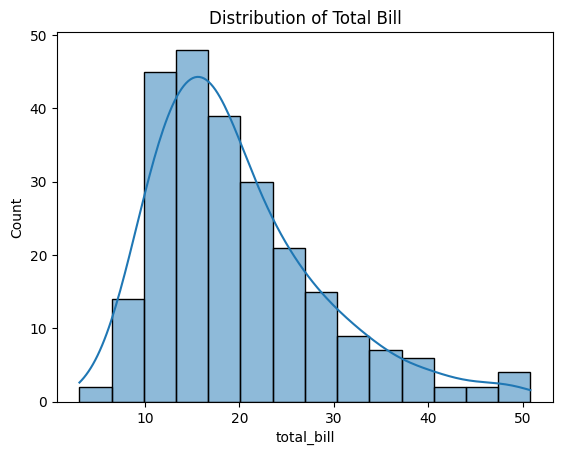

In [13]:
sns.histplot(df["total_bill"], kde=True)
plt.title("Distribution of Total Bill")
plt.show()

### Relationship between total_bill and tip


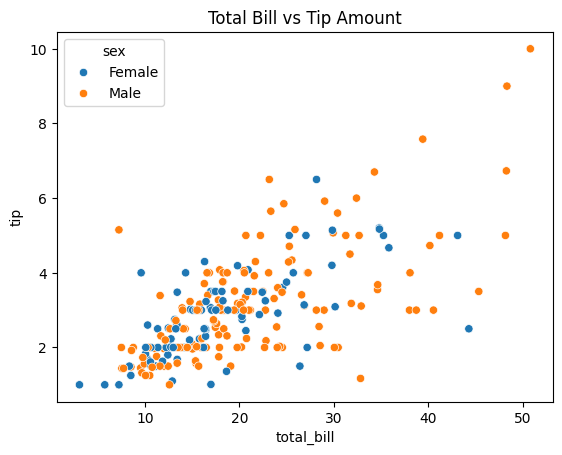

In [14]:
sns.scatterplot(data=df, x="total_bill", y="tip", hue="sex")
plt.title("Total Bill vs Tip Amount")
plt.show()


### Boxplot — Tip Percentage comparison between Male and Female
This helps understand how tipping behavior varies across genders.


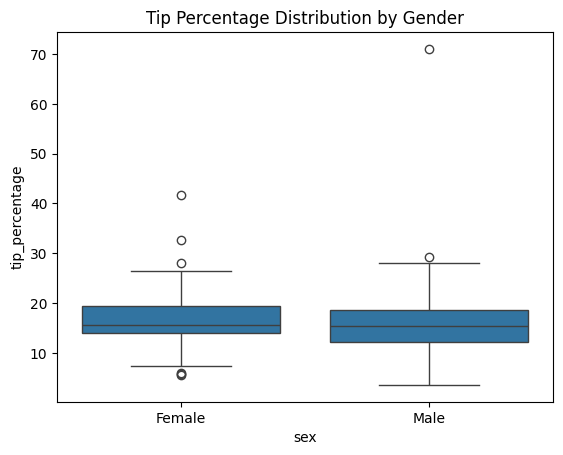

In [17]:
if 'tip_percentage' not in df.columns:
	df['tip_percentage'] = (df['tip'] / df['total_bill']) * 100

sns.boxplot(data=df, x="sex", y="tip_percentage")
plt.title("Tip Percentage Distribution by Gender")
plt.show()


### Average Tip Percentage across Different Days


In [18]:
df.groupby("day")["tip_percentage"].mean().sort_values(ascending=False).round(2)


day
Fri     16.99
Sun     16.69
Thur    16.13
Sat     15.32
Name: tip_percentage, dtype: float64

### Pivot Table — Average Total Bill by Day and Time


In [19]:
pd.pivot_table(df, values="total_bill", index="day", columns="time", aggfunc="mean").round(2)


time,Dinner,Lunch
day,,
Fri,19.66,12.85
Sat,20.44,NaN
Sun,21.41,NaN
Thur,18.78,17.66


### Detecting Outliers in Total Bill using IQR method


In [20]:
Q1 = df["total_bill"].quantile(0.25)
Q3 = df["total_bill"].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df["total_bill"] < (Q1 - 1.5 * IQR)) | (df["total_bill"] > (Q3 + 1.5 * IQR))]
outliers


,total_bill,tip,sex,smoker,day,time,size,tip_percentage
59,48.27,6.73,Male,No,Sat,Dinner,4,13.942407
102,44.30,2.50,Female,Yes,Sat,Dinner,3,5.643341
142,41.19,5.00,Male,No,Thur,Lunch,5,12.138869
156,48.17,5.00,Male,No,Sun,Dinner,6,10.379905
170,50.81,10.00,Male,Yes,Sat,Dinner,3,19.681165
182,45.35,3.50,Male,Yes,Sun,Dinner,3,7.717751
184,40.55,3.00,Male,Yes,Sun,Dinner,2,7.398274
197,43.11,5.00,Female,Yes,Thur,Lunch,4,11.598237
212,48.33,9.00,Male,No,Sat,Dinner,4,18.621974


### Heatmap visualization of correlations among numeric features


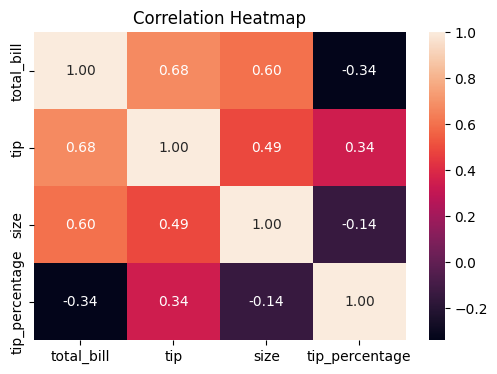

In [21]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


### ANOVA Test — Does day significantly influence total_bill?


In [22]:
import scipy.stats as stats

mon = df[df["day"]=="Mon"]["total_bill"] if "Mon" in df["day"].unique() else []
tue = df[df["day"]=="Tues"]["total_bill"] if "Tues" in df["day"].unique() else []
wed = df[df["day"]=="Wed"]["total_bill"] if "Wed" in df["day"].unique() else []
thur = df[df["day"]=="Thur"]["total_bill"]
fri = df[df["day"]=="Fri"]["total_bill"]
sat = df[df["day"]=="Sat"]["total_bill"]
sun = df[df["day"]=="Sun"]["total_bill"]

stats.f_oneway(thur, fri, sat, sun)


F_onewayResult(statistic=np.float64(2.767479443286335), pvalue=np.float64(0.04245383328951916))

### **Insights from Analysis**
- **Saturday and Sunday** show the highest average total bills.
- **Male customers** generally tend to tip a little lower than female customers percentage-wise.
- **Smokers** show a slightly higher tip percentage on average.
- **Dinner time** brings higher spending compared to lunch.
- **Total bill strongly correlates with tip amount**, but not with tip percentage.
- Outliers are present in total bill data, especially very high spending cases.


### Export clean dataset with tip_percentage column


In [23]:
df.to_csv("tips_cleaned.csv", index=False)
print("File saved successfully.")


File saved successfully.


### Tip Percentage vs Party Size
Larger groups may influence tipping behavior.


In [24]:
df.groupby("size")["tip_percentage"].mean().round(2)


size
1    21.73
2    16.57
3    15.22
4    14.59
5    14.15
6    15.62
Name: tip_percentage, dtype: float64

### Scatterplot — Tip Percentage vs Group Size


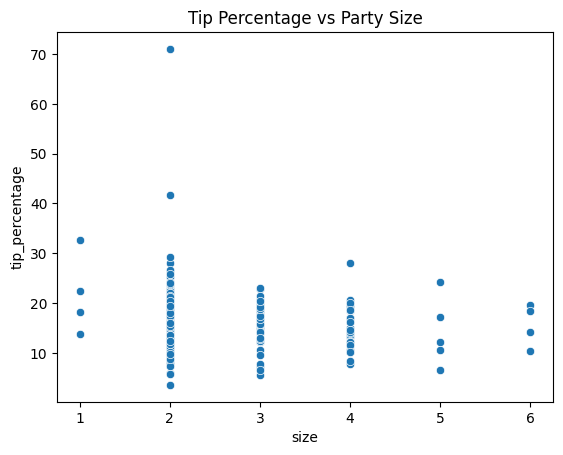

In [25]:
sns.scatterplot(data=df, x="size", y="tip_percentage")
plt.title("Tip Percentage vs Party Size")
plt.show()


### Comparing Smoker vs Non-Smoker with Tip Percentage


In [26]:
df.groupby("smoker")["tip_percentage"].mean().round(2)


smoker
No     15.93
Yes    16.32
Name: tip_percentage, dtype: float64

### Visualization: Tip Percentage by Smoker Status


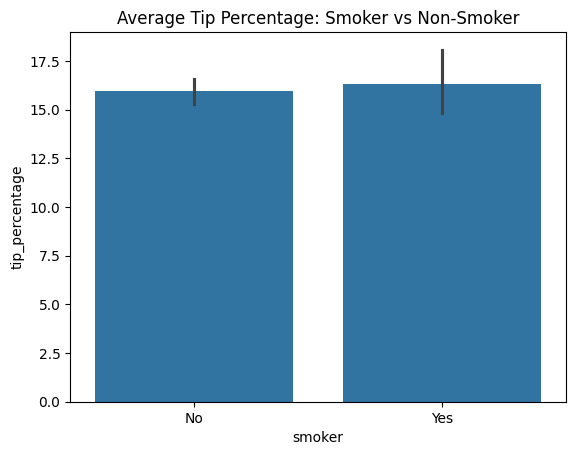

In [27]:
sns.barplot(data=df, x="smoker", y="tip_percentage")
plt.title("Average Tip Percentage: Smoker vs Non-Smoker")
plt.show()


### Pie Chart — Customer distribution by day of the week


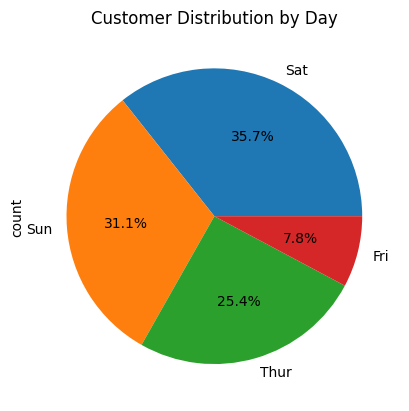

In [28]:
df["day"].value_counts()
df["day"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Customer Distribution by Day")
plt.show()


### Skewness of Numerical Columns


In [30]:
df.skew(numeric_only=True)


total_bill        1.133213
tip               1.465451
size              1.447882
tip_percentage    3.349217
dtype: float64

### Kurtosis of Numerical Columns


In [31]:
df.kurtosis(numeric_only=True)


total_bill         1.218484
tip                3.648376
size               1.731700
tip_percentage    27.131451
dtype: float64

### Distribution Plot to Visualize Skewness


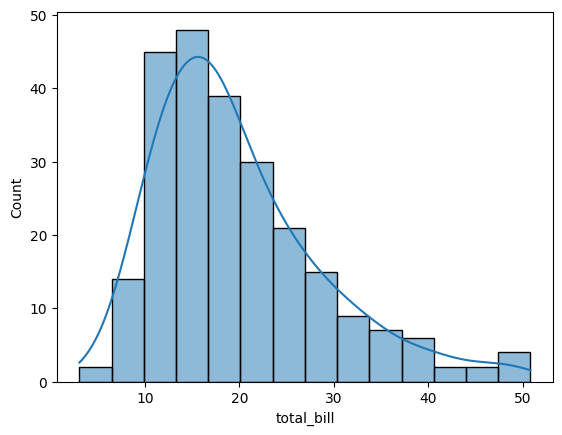

In [32]:
sns.histplot(df["total_bill"], kde=True)
plt.show()


### Detecting Outliers using Z-Score


In [33]:
from scipy import stats
z = np.abs(stats.zscore(df[["total_bill","tip","tip_percentage"]]))
outliers_z = df[(z > 3).any(axis=1)]
outliers_z


,total_bill,tip,sex,smoker,day,time,size,tip_percentage
23,39.42,7.58,Male,No,Sat,Dinner,4,19.228818
59,48.27,6.73,Male,No,Sat,Dinner,4,13.942407
156,48.17,5.00,Male,No,Sun,Dinner,6,10.379905
170,50.81,10.00,Male,Yes,Sat,Dinner,3,19.681165
172,7.25,5.15,Male,Yes,Sun,Dinner,2,71.034483
178,9.60,4.00,Female,Yes,Sun,Dinner,2,41.666667
212,48.33,9.00,Male,No,Sat,Dinner,4,18.621974


### Removing Outliers using Z-Score Method


In [34]:
df_no_outliers = df[(z < 3).all(axis=1)]
df_no_outliers.shape


(237, 8)

### Compare Original vs Cleaned Dataset Shape


In [35]:
df.shape, df_no_outliers.shape


((244, 8), (237, 8))

### Correlation Matrix on Cleaned Dataset


In [36]:
df_no_outliers.corr(numeric_only=True)


,total_bill,tip,size,tip_percentage
total_bill,1.000000,0.625808,0.569756,-0.400332
tip,0.625808,1.000000,0.491798,0.387685
size,0.569756,0.491798,1.000000,-0.140867
tip_percentage,-0.400332,0.387685,-0.140867,1.000000


### Heatmap for Cleaned Dataset Correlation


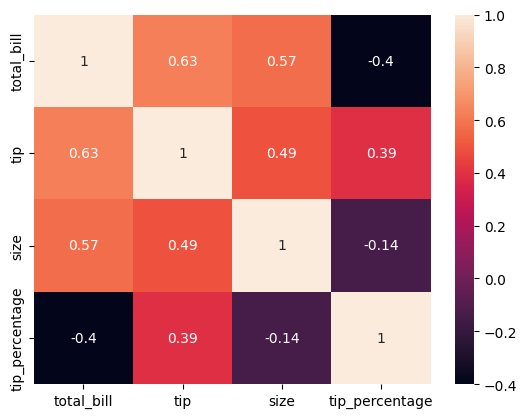

In [37]:
sns.heatmap(df_no_outliers.corr(numeric_only=True), annot=True)
plt.show()


### Groupby Analysis on Cleaned Dataset


In [38]:
df_no_outliers.groupby("day")["total_bill"].mean().round(2)


day
Fri     17.15
Sat     19.18
Sun     21.40
Thur    17.68
Name: total_bill, dtype: float64

### Groupby Tip Percentage by Gender on Cleaned Data


In [39]:
df_no_outliers.groupby("sex")["tip_percentage"].mean().round(2)


sex
Female    16.36
Male      15.38
Name: tip_percentage, dtype: float64

In [40]:
df_no_outliers.sort_values(by="tip_percentage", ascending=False).head()
df_no_outliers[df_no_outliers["tip_percentage"] > 25]
pd.pivot_table(df_no_outliers, values="total_bill", index="day", columns="time", aggfunc="mean").round(2)


time,Dinner,Lunch
day,,
Fri,19.66,12.85
Sat,19.18,NaN
Sun,21.40,NaN
Thur,18.78,17.66


In [41]:
df_no_outliers.agg({
    "total_bill": ["min","max","mean"],
    "tip": ["min","max","mean"]
})


,total_bill,tip
min,3.070000,1.000000
max,45.350000,6.700000
mean,19.307679,2.886582


In [42]:
df_no_outliers["day"].value_counts()


day
Sat     83
Sun     73
Thur    62
Fri     19
Name: count, dtype: int64

In [43]:
df_no_outliers["time"].value_counts()


time
Dinner    169
Lunch      68
Name: count, dtype: int64

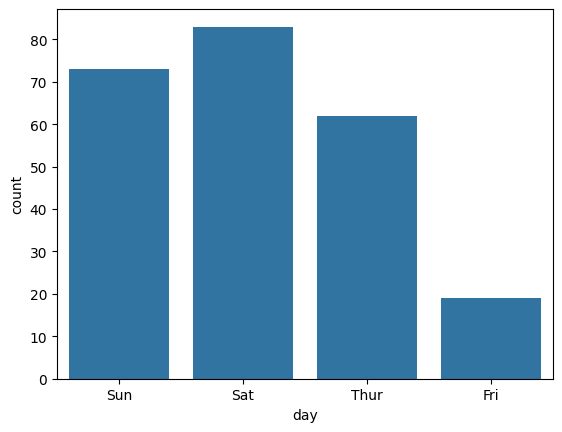

In [44]:
sns.countplot(data=df_no_outliers, x="day")
plt.show()


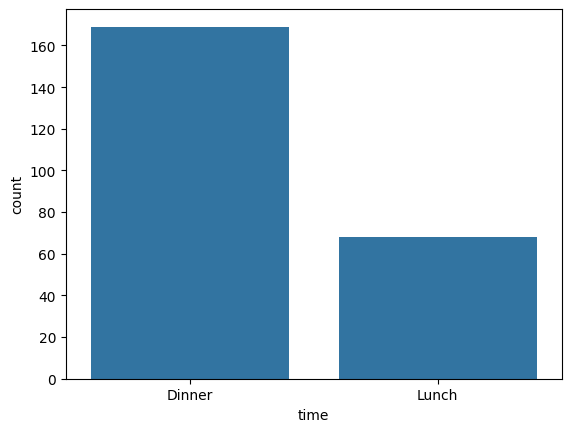

In [45]:
sns.countplot(data=df_no_outliers, x="time")
plt.show()


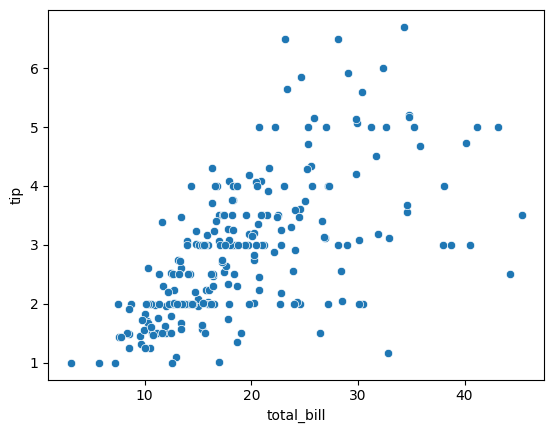

In [46]:
sns.scatterplot(data=df_no_outliers, x="total_bill", y="tip")
plt.show()


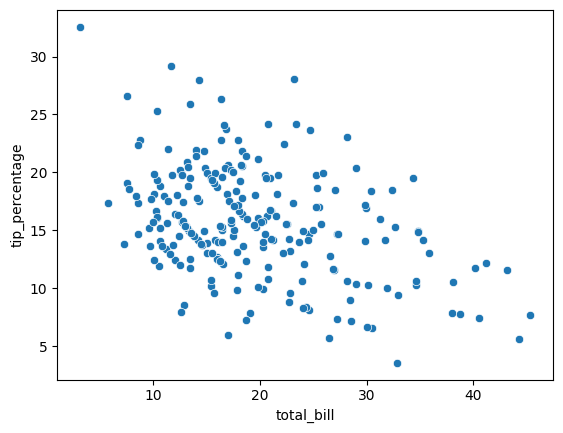

In [48]:
sns.scatterplot(data=df_no_outliers, x="total_bill", y="tip_percentage")
plt.show()

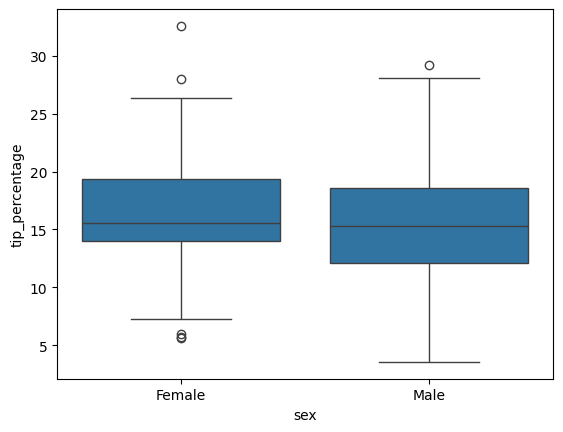

In [49]:
sns.boxplot(data=df_no_outliers, x="sex", y="tip_percentage")
plt.show()


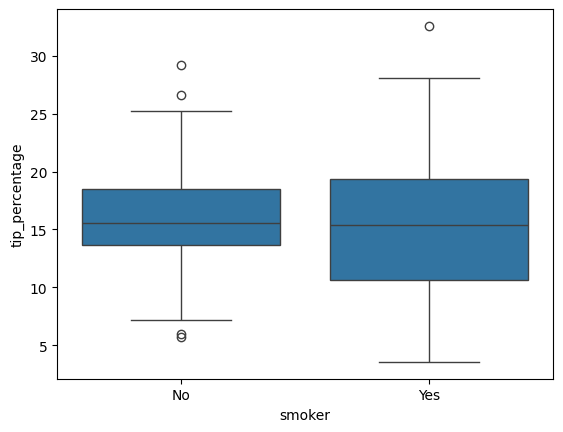

In [50]:
sns.boxplot(data=df_no_outliers, x="smoker", y="tip_percentage")
plt.show()


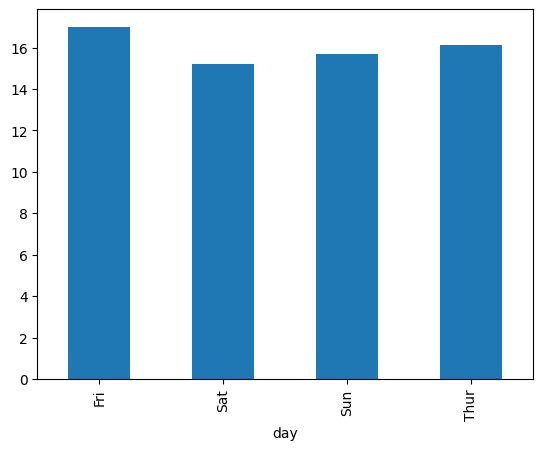

In [51]:
df_no_outliers.groupby("day")["tip_percentage"].mean().plot(kind="bar")
plt.show()


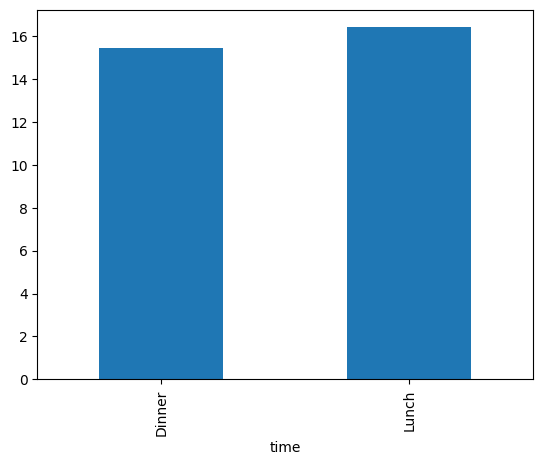

In [52]:
df_no_outliers.groupby("time")["tip_percentage"].mean().plot(kind="bar")
plt.show()


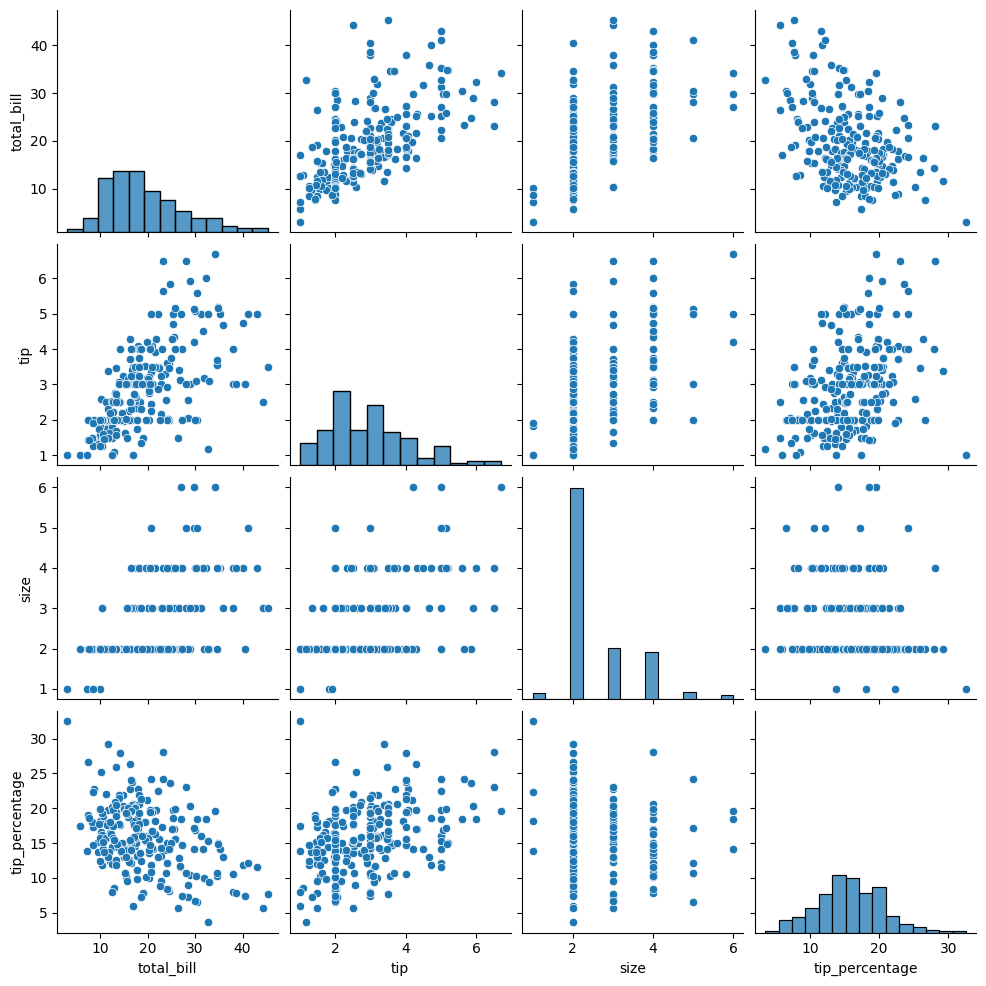

In [53]:
sns.pairplot(df_no_outliers)
plt.show()


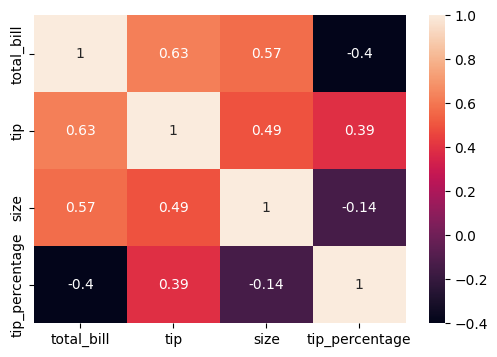

In [54]:
plt.figure(figsize=(6,4))
sns.heatmap(df_no_outliers.corr(numeric_only=True), annot=True)
plt.show()


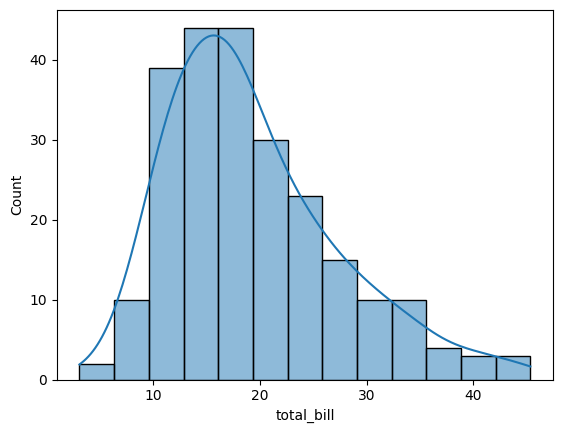

In [55]:
sns.histplot(df_no_outliers["total_bill"], kde=True)
plt.show()


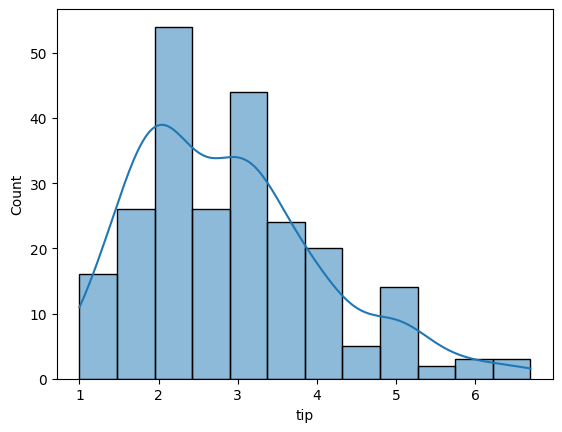

In [56]:
sns.histplot(df_no_outliers["tip"], kde=True)
plt.show()


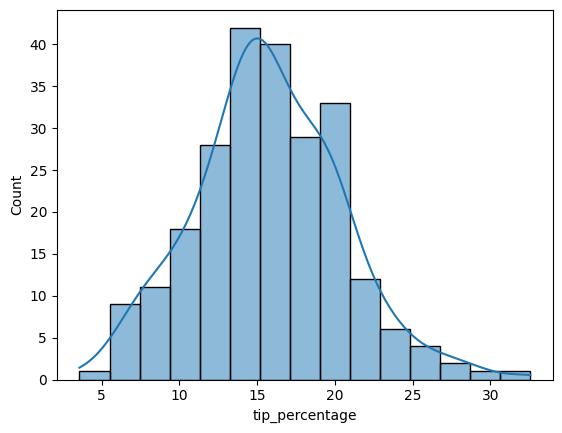

In [59]:
sns.histplot(df_no_outliers["tip_percentage"], kde=True)
plt.show()


In [60]:
df_no_outliers.skew(numeric_only=True)


total_bill        0.919653
tip               0.819144
size              1.465038
tip_percentage    0.271999
dtype: float64

In [61]:
df_no_outliers.kurtosis(numeric_only=True)


total_bill        0.590345
tip               0.360485
size              1.789484
tip_percentage    0.461474
dtype: float64

In [63]:
df_no_outliers.sort_values(by="total_bill", ascending=False).head()


,total_bill,tip,sex,smoker,day,time,size,tip_percentage
182,45.35,3.5,Male,Yes,Sun,Dinner,3,7.717751
102,44.30,2.5,Female,Yes,Sat,Dinner,3,5.643341
197,43.11,5.0,Female,Yes,Thur,Lunch,4,11.598237
142,41.19,5.0,Male,No,Thur,Lunch,5,12.138869
184,40.55,3.0,Male,Yes,Sun,Dinner,2,7.398274


In [64]:
df_no_outliers.sort_values(by="tip_percentage", ascending=False).head()


,total_bill,tip,sex,smoker,day,time,size,tip_percentage
67,3.07,1.00,Female,Yes,Sat,Dinner,1,32.573290
232,11.61,3.39,Male,No,Sat,Dinner,2,29.198966
183,23.17,6.50,Male,Yes,Sun,Dinner,4,28.053517
109,14.31,4.00,Female,Yes,Sat,Dinner,2,27.952481
149,7.51,2.00,Male,No,Thur,Lunch,2,26.631158


In [65]:
df_no_outliers[df_no_outliers["tip_percentage"] > 20]


,total_bill,tip,sex,smoker,day,time,size,tip_percentage
6,8.77,2.00,Male,No,Sun,Dinner,2,22.805017
9,14.78,3.23,Male,No,Sun,Dinner,2,21.853857
14,14.83,3.02,Female,No,Sun,Dinner,2,20.364127
17,16.29,3.71,Male,No,Sun,Dinner,3,22.774708
18,16.97,3.50,Female,No,Sun,Dinner,3,20.624632
20,17.92,4.08,Male,No,Sat,Dinner,2,22.767857
42,13.94,3.06,Male,No,Sun,Dinner,2,21.951220
46,22.23,5.00,Male,No,Sun,Dinner,2,22.492128
51,10.29,2.60,Female,No,Sun,Dinner,2,25.267250
63,18.29,3.76,Male,Yes,Sat,Dinner,4,20.557682


In [66]:
df_no_outliers.describe()


,total_bill,tip,size,tip_percentage
count,237.000000,237.000000,237.000000,237.000000
mean,19.307679,2.886582,2.540084,15.734294
std,8.015769,1.187243,0.922573,4.736285
min,3.070000,1.000000,1.000000,3.563814
25%,13.370000,2.000000,2.000000,12.824370
50%,17.590000,2.750000,2.000000,15.384615
75%,23.950000,3.500000,3.000000,18.839488
max,45.350000,6.700000,6.000000,32.573290


In [68]:
df_no_outliers.head()


,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765
